# __Injury Analysis - Atletico de Madrid - 2023/24 Season__

##### _For this analysis, Sofascore's ratings shall be used to determine the quality of performance for the team and the individual players_

##### _'Match_results.csv' --> Results of Atletico Madrid's competitive matches played in 2023/24 season including the average Sofascore team rating for each match_

##### _'KP_injury_history.csv' --> 2023/24 injury record (according to Transfermarkt) of Atletico Madrid's __key players__ (Top 10 players with highest average Sofascore rating for the season)_

### __Importing Libraries__

In [1]:
#importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### __Loading Datasets__

In [2]:
#loading match history 
matches_df = pd.read_csv('datasets/Match_results.csv')

#loading injury history of key players
key_injuries_df = pd.read_csv('datasets/KP_injury_history.csv')


In [3]:
matches_df

,ID,Match Date,Competition,Opponent,Home/Away,Result,GF,GA,SS Rating
0,1,2023-08-14,La Liga,Granada,Home,Win,3,1,7.04
1,2,2023-08-20,La Liga,Real Betis,Away,Draw,0,0,6.90
2,3,2023-08-28,La Liga,Rayo Vallecano,Away,Win,7,0,7.45
3,4,2023-09-16,La Liga,Valencia,Away,Loss,0,3,6.77
4,5,2023-09-19,UCL,Lazio,Away,Draw,1,1,7.00
5,6,2023-09-24,La Liga,Real Madrid,Home,Win,3,1,7.09
6,7,2023-09-28,La Liga,Osasuna,Away,WIn,2,0,6.97
7,8,2023-10-01,La Liga,Cadiz,Home,Win,3,2,7.17
8,9,2023-10-04,UCL,Feyenoord,Home,Win,3,2,6.87
9,10,2023-10-08,La Liga,Real Sociedad,Home,Win,2,1,6.89


In [4]:
matches_df.dtypes

ID               int64
Match Date      object
Competition     object
Opponent        object
Home/Away       object
Result          object
GF              object
GA              object
SS Rating      float64
dtype: object

In [5]:
key_injuries_df

,ID,Injury Start Date,Injury End Date,Name,Injury Type,Games Missed
0,1,2023-08-15,2023-09-22,Koke,Muscle,4
1,2,2023-08-15,2023-08-25,Angel Correa,Ankle,1
2,3,2023-09-12,2023-09-29,Rodrigo De Paul,Hamstring,4
3,4,2023-09-26,2023-09-30,Angel Correa,Knee,1
4,5,2023-10-22,2023-11-05,Samuel Lino,Knee,3
5,6,2023-11-29,2024-01-19,Pablo Barrios,Meniscus,9
6,7,2024-02-11,2024-02-20,Alvaro Morata,Inner Ligament,3
7,8,2024-02-21,2024-03-12,Antoine Griezmann,Ankle,4
8,9,2024-03-16,2024-04-11,Mario Hermoso,Muscle,3


In [6]:
key_injuries_df.dtypes

ID                    int64
Injury Start Date    object
Injury End Date      object
Name                 object
Injury Type          object
Games Missed          int64
dtype: object

### __Data Cleaning__

Converting dataframes' dates to a datetime format

In [7]:
matches_df['Match Date'] = pd.to_datetime(matches_df['Match Date'])

matches_df.dtypes

ID                      int64
Match Date     datetime64[ns]
Competition            object
Opponent               object
Home/Away              object
Result                 object
GF                     object
GA                     object
SS Rating             float64
dtype: object

In [8]:
key_injuries_df['Injury Start Date'] = pd.to_datetime(key_injuries_df['Injury Start Date'])

key_injuries_df['Injury End Date'] = pd.to_datetime(key_injuries_df['Injury End Date'])

key_injuries_df.dtypes

ID                            int64
Injury Start Date    datetime64[ns]
Injury End Date      datetime64[ns]
Name                         object
Injury Type                  object
Games Missed                  int64
dtype: object

### __Impact of Key Player Injuries on Team Performance__

#### _Analysing number of injuries by month_

In [9]:
# adding injury start and end months 
key_injuries_df['Injury Start Month'] = key_injuries_df['Injury Start Date'].dt.to_period('M')

key_injuries_df['Injury End Month'] = key_injuries_df['Injury End Date'].dt.to_period('M')

# extracting match day months
period = pd.period_range(start=matches_df['Match Date'].iloc[0], end=matches_df['Match Date'].iloc[-1], freq='M')

key_injuries_df

,ID,Injury Start Date,Injury End Date,Name,Injury Type,Games Missed,Injury Start Month,Injury End Month
0,1,2023-08-15,2023-09-22,Koke,Muscle,4,2023-08,2023-09
1,2,2023-08-15,2023-08-25,Angel Correa,Ankle,1,2023-08,2023-08
2,3,2023-09-12,2023-09-29,Rodrigo De Paul,Hamstring,4,2023-09,2023-09
3,4,2023-09-26,2023-09-30,Angel Correa,Knee,1,2023-09,2023-09
4,5,2023-10-22,2023-11-05,Samuel Lino,Knee,3,2023-10,2023-11
5,6,2023-11-29,2024-01-19,Pablo Barrios,Meniscus,9,2023-11,2024-01
6,7,2024-02-11,2024-02-20,Alvaro Morata,Inner Ligament,3,2024-02,2024-02
7,8,2024-02-21,2024-03-12,Antoine Griezmann,Ankle,4,2024-02,2024-03
8,9,2024-03-16,2024-04-11,Mario Hermoso,Muscle,3,2024-03,2024-04


In [10]:
# dictionary to store number of injured players per month
monthly_injured = {month: 0 for month in period}
months = []

for month in period:
    for index, row in key_injuries_df.iterrows():
        if row['Injury Start Month'] <= month <= row['Injury End Month']:
            monthly_injured[month] += 1 
    months.append(str(month))

monthly_injured

{Period('2023-08', 'M'): 2,
 Period('2023-09', 'M'): 3,
 Period('2023-10', 'M'): 1,
 Period('2023-11', 'M'): 2,
 Period('2023-12', 'M'): 1,
 Period('2024-01', 'M'): 1,
 Period('2024-02', 'M'): 2,
 Period('2024-03', 'M'): 2,
 Period('2024-04', 'M'): 1,
 Period('2024-05', 'M'): 0}

Text(0, 0.5, 'No. of key players injured')

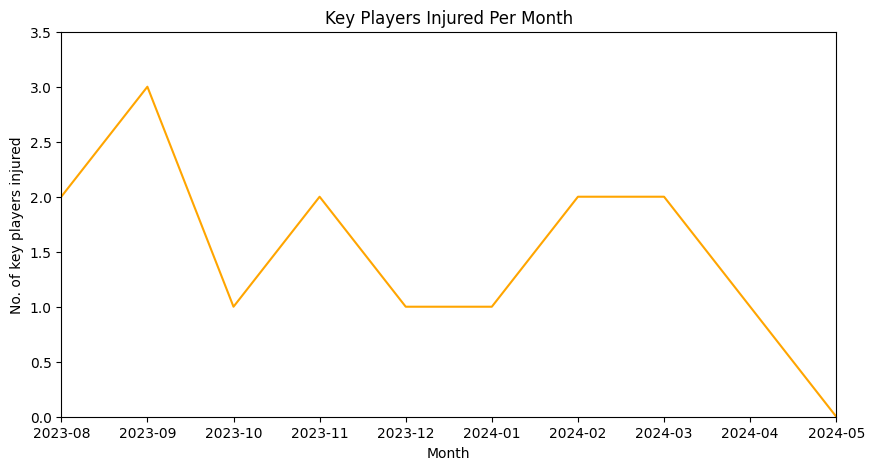

In [11]:
# plotting the data
plt.figure(figsize=(10,5))
plt.plot(months, monthly_injured.values(), color='orange')
plt.title("Key Players Injured Per Month")
plt.xlabel("Month")
plt.xlim(months[0], months[-1])
plt.ylim(0, 3.5)
plt.ylabel("No. of key players injured")

##### __Inference__:
- Most key players were injured in September
- November and February were also periods of increasing injuries
- Longer periods of injuries seen in December to January and February to March
- Injuries eventually stopped by the end of the season

#### _Analysing team performance by month_

In [12]:
# average SofaScore rating of the team by month
monthly_ss_rating = matches_df.groupby(pd.PeriodIndex(matches_df['Match Date'], freq="M"))['SS Rating'].mean()

monthly_ss_rating

Match Date
2023-08    7.130000
2023-09    6.957500
2023-10    7.050000
2023-11    7.216000
2023-12    6.930000
2024-01    7.072857
2024-02    6.924286
2024-03    6.870000
2024-04    6.878333
2024-05    7.034000
Freq: M, Name: SS Rating, dtype: float64

Text(0, 0.5, 'Avg. Monthly SofaScore Rating')

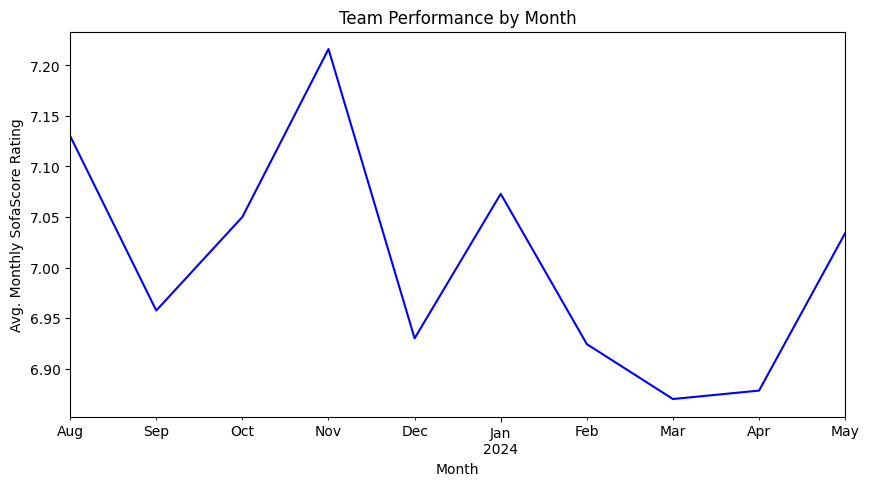

In [13]:
# plotting the ratings
plt.figure(figsize=(10,5))
monthly_ss_rating.plot(color='blue')
plt.title("Team Performance by Month")
plt.xlabel("Month")
plt.ylabel("Avg. Monthly SofaScore Rating")

##### __Inference:__
- Best string of performances from October to November
- Good performances also seen in December to January and at the end of the season
- Bad performances in September, November to December and January to March

#### _Comparing the two plots_

Text(0.5, 1.0, 'Key Players Injured vs. Team Performance')

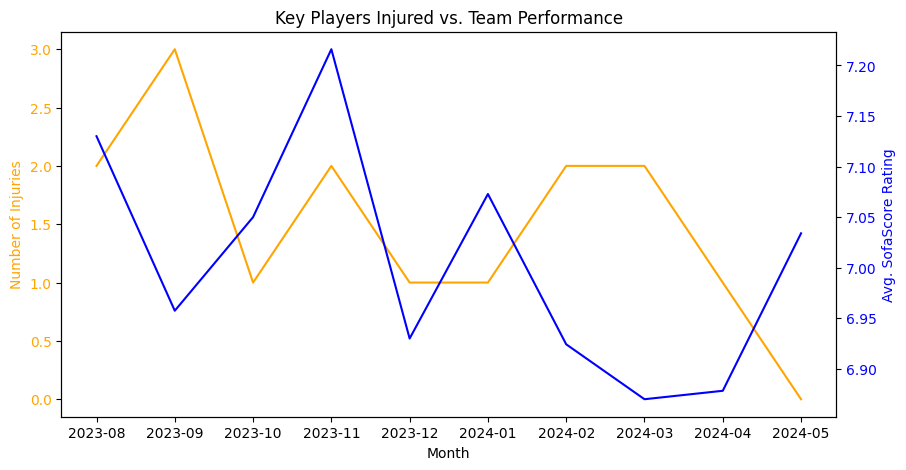

In [14]:
#setting up a dual Y axis graph
fig, ax1 = plt.subplots(figsize = (10,5))
ax2 = ax1.twinx()
ax1.plot(months, monthly_injured.values(), color = 'orange')
ax1.set_ylabel("Number of Injuries", color = 'orange')
ax1.set_xlabel("Month")
ax1.tick_params(axis='y', labelcolor = 'orange')

ax2.plot(monthly_ss_rating.values, color='blue')
ax2.set_ylabel("Avg. SofaScore Rating", color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')

plt.title("Key Players Injured vs. Team Performance")

##### __Inference:__
- As the number of injuries increases, the team’s performance, measured by the average SofaScore rating, tends to decrease. Conversely, when there are fewer injuries, the performance improves.\
For example, in November 2023, the number of injuries peaks, and the average Sofascore rating drops significantly in the following months.
- In some months, a slight increase in injuries corresponds to a noticeable drop in performance, while in other months, the impact is less pronounced.
- The impact of recovery on performance may not be immediate.\
For instance, despite the decrease in injuries from December 2023 to January 2024, the team's performance does not improve significantly until February 2024.

#### __The analysis suggests that there is a noticeable impact of key player injuries on the team's performance. Teams with fewer injuries to key players may tend to perform better on average, while an increase in injuries correlates with a decrease in performance.__

### __Performance Metrics Comparison__

stats and stuff